In [ ]:
import pandas as pd
import datetime as dt
from geopy.distance import distance
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from geopy.geocoders import Nominatim
from geopy.point import Point
from pygeocoder import Geocoder

In [ ]:
rest_cuisine = pd.read_csv('rest_cuisine.csv')
rest_location = pd.read_csv('rest_location.csv')
rest_parking = pd.read_csv('rest_parking.csv')
rest_payment = pd.read_csv('rest_payment.csv')
user_cuisine = pd.read_csv('user_cuisine.csv')
user_payment = pd.read_csv('user_payment.csv')
user_profile = pd.read_csv('user_profile.csv')

In [ ]:
users = user_profile.merge(user_cuisine, how='inner', on='userID').merge(user_payment, how='inner', on='userID')

In [ ]:
restaurants = rest_cuisine.merge(rest_location, how='inner', on='placeID').merge(rest_parking, how='inner', on='placeID').merge(rest_payment, how='inner', on='placeID')

In [ ]:
users.isnull().sum()

userID              0
latitude            0
longitude           0
smoker              0
drink_level         0
dress_preference    0
ambience            0
transport           0
marital_status      0
hijos               0
birth_year          0
interest            0
personality         0
religion            0
activity            0
color               0
weight              0
budget              0
height              0
Rcuisine            0
Upayment            0
dtype: int64

In [ ]:
restaurants.isnull().sum()

placeID           0
Rcuisine          0
latitude          0
longitude         0
the_geom_meter    0
name              0
address           0
city              0
state             0
country           0
fax               0
zip               0
alcohol           0
smoking_area      0
dress_code        0
accessibility     0
price             0
url               0
Rambience         0
franchise         0
area              0
other_services    0
parking_lot       0
Rpayment          0
dtype: int64

In [ ]:
ratings = pd.read_csv('rating_final.csv')
ratings.isnull().sum()

userID            0
placeID           0
rating            0
food_rating       0
service_rating    0
dtype: int64

In [ ]:
ratings.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userID          1161 non-null   object
 1   placeID         1161 non-null   int64 
 2   rating          1161 non-null   int64 
 3   food_rating     1161 non-null   int64 
 4   service_rating  1161 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 45.5+ KB


In [ ]:
ratings.describe()

,placeID,rating,food_rating,service_rating
count,1161.000000,1161.000000,1161.000000,1161.000000
mean,134192.041344,1.199828,1.215332,1.090439
std,1100.916275,0.773282,0.792294,0.790844
min,132560.000000,0.000000,0.000000,0.000000
25%,132856.000000,1.000000,1.000000,0.000000
50%,135030.000000,1.000000,1.000000,1.000000
75%,135059.000000,2.000000,2.000000,2.000000
max,135109.000000,2.000000,2.000000,2.000000


In [ ]:
u_ratings = ratings[['userID', 'rating']]
u_ratings = u_ratings.groupby('userID').agg({'rating':'count'})
u_ratings.describe()

,rating
count,138.000000
mean,8.413043
std,3.380339
min,3.000000
25%,5.000000
50%,9.000000
75%,11.000000
max,18.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Overall Restaurant Ratings')]

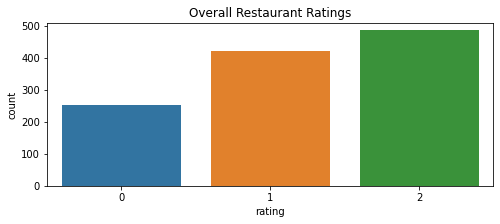

In [ ]:
plt.figure(figsize=(8,3))
sns.countplot(ratings.rating).set(title='Overall Restaurant Ratings')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Restaurant Food Ratings')]

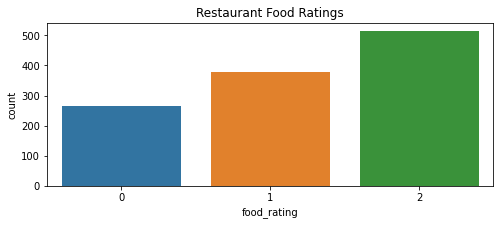

In [ ]:
plt.figure(figsize=(8,3))
sns.countplot(ratings.food_rating).set(title='Restaurant Food Ratings')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Restaurant Service Ratings')]

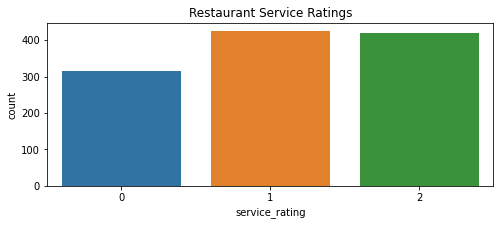

In [ ]:
plt.figure(figsize=(8,3))
sns.countplot(ratings.service_rating).set(title='Restaurant Service Ratings')
#this shows guests may be more critical when it comes to service

In [ ]:
#there are no outliers

In [ ]:
#the user who gave the most ratings gave 18
ratings.groupby('userID').count().sort_values('placeID', ascending=False)

,placeID,rating,food_rating,service_rating
userID,,,,
U1106,18,18,18,18
U1061,18,18,18,18
U1134,16,16,16,16
U1024,15,15,15,15
U1137,14,14,14,14
...,...,...,...,...
U1031,3,3,3,3
U1021,3,3,3,3
U1017,3,3,3,3


In [ ]:
#the restaurant with the most ratings had 36 ratings
ratings.groupby('placeID').count().sort_values('userID', ascending=False)

,userID,rating,food_rating,service_rating
placeID,,,,
135085,36,36,36,36
132825,32,32,32,32
135032,28,28,28,28
135052,25,25,25,25
132834,25,25,25,25
...,...,...,...,...
132766,3,3,3,3
132717,3,3,3,3
135011,3,3,3,3


In [ ]:
users.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height,Rcuisine,Upayment
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77,American,cash
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87,Mexican,cash
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69,Mexican,cash
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53,Bakery,cash
4,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53,Bakery,bank_debit_cards


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 0 to 410
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userID            411 non-null    object 
 1   latitude          411 non-null    float64
 2   longitude         411 non-null    float64
 3   smoker            411 non-null    object 
 4   drink_level       411 non-null    object 
 5   dress_preference  411 non-null    object 
 6   ambience          411 non-null    object 
 7   transport         411 non-null    object 
 8   marital_status    411 non-null    object 
 9   hijos             411 non-null    object 
 10  birth_year        411 non-null    int64  
 11  interest          411 non-null    object 
 12  personality       411 non-null    object 
 13  religion          411 non-null    object 
 14  activity          411 non-null    object 
 15  color             411 non-null    object 
 16  weight            411 non-null    int64  
 1

In [ ]:
users.describe()

,latitude,longitude,birth_year,weight,height
count,411.000000,411.000000,411.000000,411.000000,411.000000
mean,21.820868,-100.496706,1984.335766,66.588808,1.662676
std,1.343752,0.786130,12.575592,13.979908,0.117320
min,18.813348,-101.054680,1930.000000,40.000000,1.200000
25%,22.143524,-100.984268,1984.000000,60.000000,1.540000
50%,22.156247,-100.949936,1988.000000,66.000000,1.670000
75%,22.170396,-99.255009,1989.500000,76.000000,1.765000
max,23.771030,-99.067106,1994.000000,120.000000,2.000000


In [ ]:
users.shape

(411, 21)

In [ ]:
users.userID.nunique()

133

In [ ]:
top10_cuisine = users['Rcuisine'].value_counts()[:10].index.to_list()

In [ ]:
top10_cuisine

['Mexican',
 'American',
 'Cafeteria',
 'Japanese',
 'Cafe-Coffee_Shop',
 'Pizzeria',
 'Family',
 'Italian',
 'Burgers',
 'Contemporary']

In [ ]:
cuisine_pref = users.Rcuisine[users.Rcuisine.isin(top10_cuisine)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Top Preferred Cuisines')]

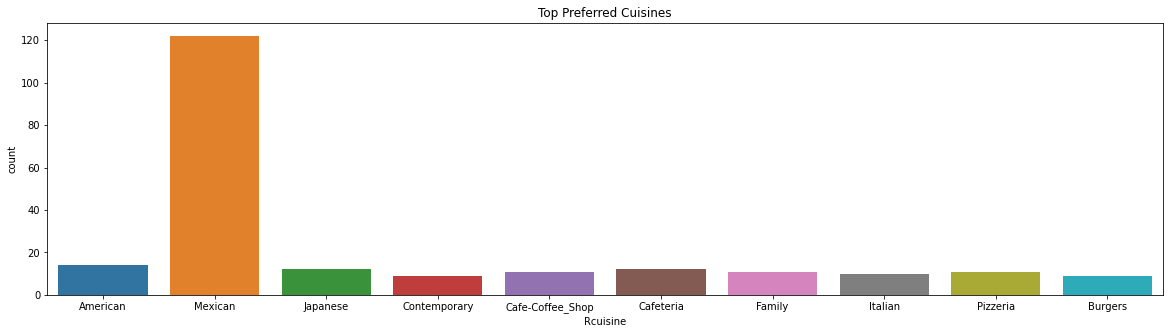

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(cuisine_pref).set(title = 'Top Preferred Cuisines')

In [ ]:
users[users.duplicated(subset='userID') == True]
#there are differences on cuisine and payment

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height,Rcuisine,Upayment
4,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53,Bakery,bank_debit_cards
5,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53,Breakfast-Brunch,cash
6,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53,Breakfast-Brunch,bank_debit_cards
7,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53,Japanese,cash
8,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53,Japanese,bank_debit_cards
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,U1135,22.170396,-100.949936,false,casual drinker,informal,family,on foot,single,kids,1988,variety,hunter-ostentatious,Catholic,student,purple,66,low,1.54,Barbecue,cash
404,U1135,22.170396,-100.949936,false,casual drinker,informal,family,on foot,single,kids,1988,variety,hunter-ostentatious,Catholic,student,purple,66,low,1.54,French,cash
405,U1135,22.170396,-100.949936,false,casual drinker,informal,family,on foot,single,kids,1988,variety,hunter-ostentatious,Catholic,student,purple,66,low,1.54,Brazilian,cash
406,U1135,22.170396,-100.949936,false,casual drinker,informal,family,on foot,single,kids,1988,variety,hunter-ostentatious,Catholic,student,purple,66,low,1.54,Southern,cash


In [ ]:
#dropping these two for now..
users = users.drop(['Rcuisine', 'Upayment', 'color'], axis=1)

In [ ]:
users.shape

(411, 18)

In [ ]:
users.drop_duplicates(keep="first", inplace=True)

In [ ]:
users.shape

(133, 18)

In [ ]:
#conversions
users.height = users.height * 3.28084
users.weight = users.weight * 2.20462
users.birth_year = 2021 - users.birth_year

In [ ]:
#find all ?s
users[users.values == '?']

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,weight,budget,height
47,U1014,23.751607,-99.170108,false,abstemious,?,friends,public,single,independent,31,none,hard-worker,Catholic,student,116.84486,medium,5.544620
64,U1017,18.952615,-99.201616,false,casual drinker,formal,family,public,single,?,30,retro,hunter-ostentatious,none,professional,174.16498,medium,5.872704
78,U1027,22.165150,-100.987015,true,social drinker,no preference,?,public,single,independent,32,retro,thrifty-protector,Catholic,student,132.27720,low,5.413386
82,U1031,23.735698,-99.159851,false,abstemious,informal,solitary,?,married,kids,29,none,hard-worker,Catholic,unemployed,88.18480,medium,5.249344
85,U1033,22.150000,-100.983000,false,social drinker,no preference,family,on foot,single,?,30,none,hard-worker,none,student,119.04948,low,5.249344
92,U1039,23.738067,-99.139906,false,social drinker,no preference,friends,?,single,independent,32,none,hard-worker,none,student,182.98346,medium,5.675853
110,U1048,22.142208,-101.022785,true,casual drinker,no preference,?,public,single,independent,33,eco-friendly,thrifty-protector,none,student,143.30030,medium,5.577428
111,U1049,22.150000,-100.983000,false,casual drinker,informal,solitary,public,single,?,30,none,hard-worker,none,student,121.25410,?,5.249344
111,U1049,22.150000,-100.983000,false,casual drinker,informal,solitary,public,single,?,30,none,hard-worker,none,student,121.25410,?,5.249344
144,U1066,18.890695,-99.157104,false,abstemious,informal,solitary,public,single,?,35,technology,thrifty-protector,Catholic,student,99.20790,low,4.757218


In [ ]:
users.budget = users.budget.replace('?', 'medium')
users.activity = users.activity.replace('?', 'unknown')
users.hijos = users.hijos.replace('?', 'independent')
users.transport = users.transport.replace('?', 'on foot')
users.ambience = users.ambience.replace('?', 'friends')
users.dress_preference = users.dress_preference.replace('?', 'no preference')
users = users[users.userID != 'U1083']

In [ ]:
users[users.values == '?']

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,weight,budget,height


[Text(0.5, 0, 'age'), Text(0.5, 1.0, 'User Age')]

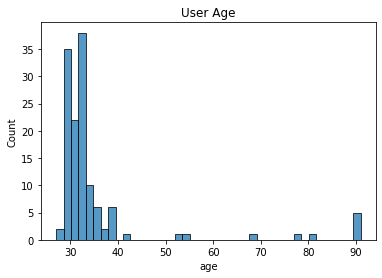

In [ ]:
sns.histplot(users.birth_year).set(title='User Age', xlabel='age')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Guest Drink Level')]

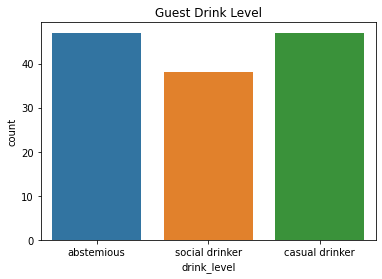

In [ ]:
sns.countplot(users.drink_level).set(title='Guest Drink Level')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Guest Dress Preference')]

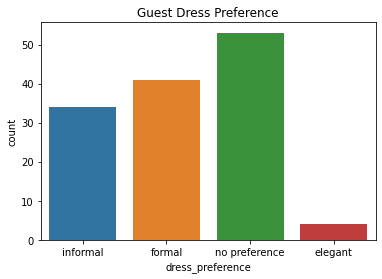

In [ ]:
sns.countplot(users.dress_preference).set(title='Guest Dress Preference')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Ambience Preference')]

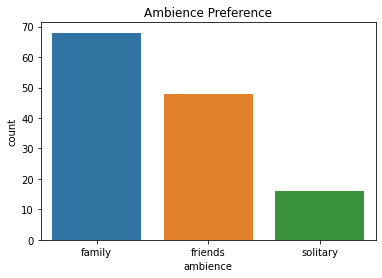

In [ ]:
sns.countplot(users.ambience).set(title='Ambience Preference')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


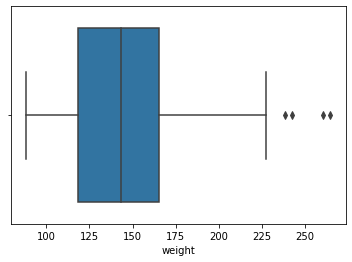

In [ ]:
sns.boxplot(users.weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


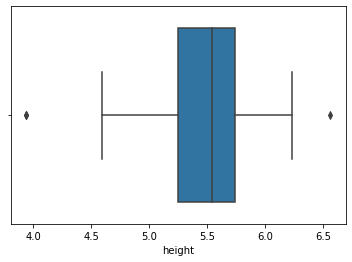

In [ ]:
sns.boxplot(users.height)

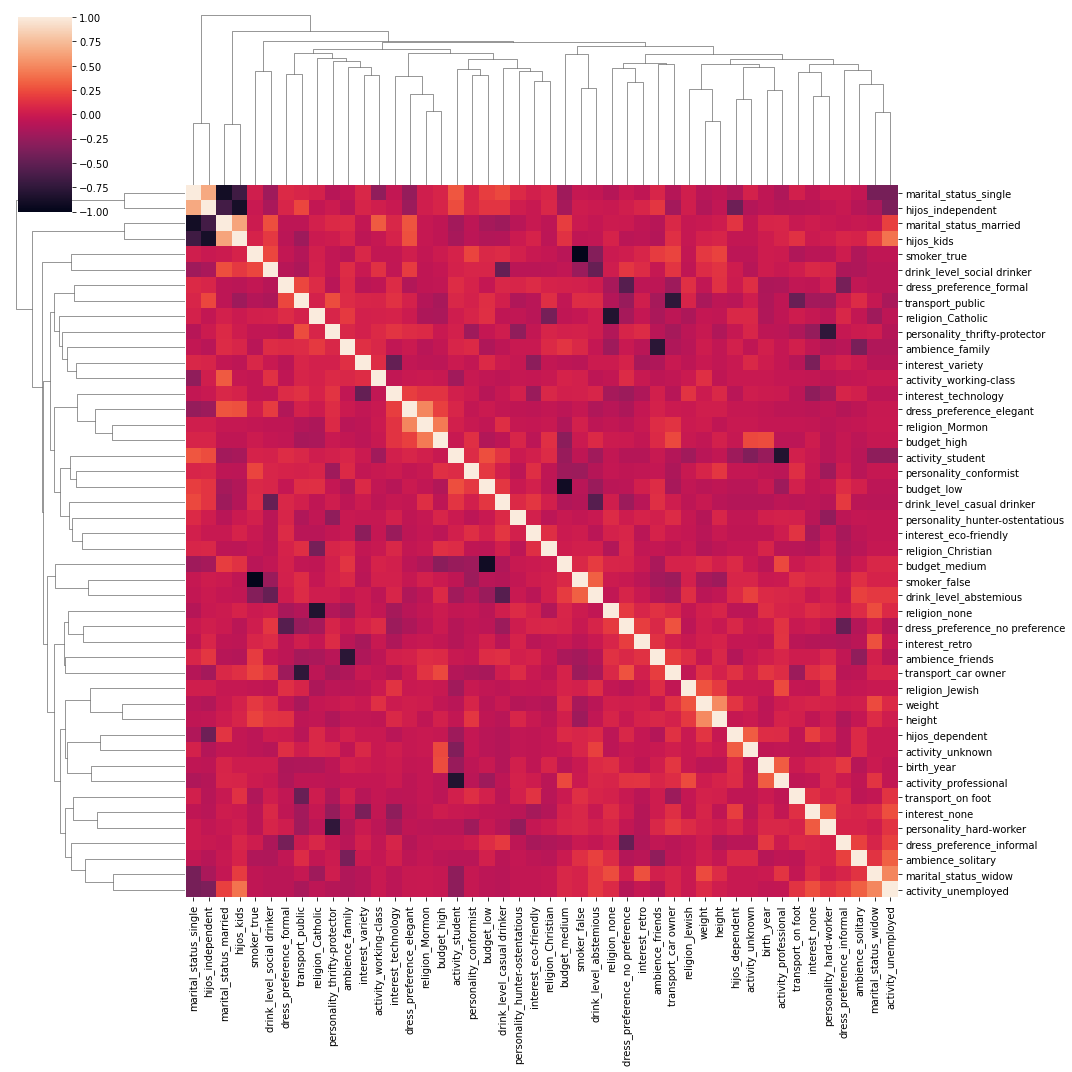

In [ ]:
users_hm = users.drop(['latitude', 'longitude', 'userID'], axis=1)
users_hm = pd.get_dummies(users_hm)
sns.clustermap(users_hm.corr(), yticklabels=True, xticklabels=True, figsize=(15,15))

In [ ]:
restaurants.head()

,placeID,Rcuisine,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,zip,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services,parking_lot,Rpayment
0,135109,Italian,18.921785,-99.235350,0101000020957F0000A6BF695F136F5AC1DADF87B20556...,Paniroles,?,?,?,?,?,?,Wine-Beer,not permitted,informal,no_accessibility,medium,?,quiet,f,closed,Internet,none,cash
1,135106,Mexican,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rinc�n de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,78000,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none,none,cash
2,135106,Mexican,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rinc�n de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,78000,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none,none,VISA
3,135106,Mexican,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rinc�n de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,78000,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none,none,MasterCard-Eurocard
4,135104,Mexican,23.752982,-99.168434,0101000020957F00007CDF5EAFC58157C1645743B23E4F...,vips,?,?,?,?,?,?,Full_Bar,not permitted,informal,completely,medium,?,familiar,t,closed,variety,yes,cash


In [ ]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 230
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   placeID         231 non-null    int64  
 1   Rcuisine        231 non-null    object 
 2   latitude        231 non-null    float64
 3   longitude       231 non-null    float64
 4   the_geom_meter  231 non-null    object 
 5   name            231 non-null    object 
 6   address         231 non-null    object 
 7   city            231 non-null    object 
 8   state           231 non-null    object 
 9   country         231 non-null    object 
 10  fax             231 non-null    object 
 11  zip             231 non-null    object 
 12  alcohol         231 non-null    object 
 13  smoking_area    231 non-null    object 
 14  dress_code      231 non-null    object 
 15  accessibility   231 non-null    object 
 16  price           231 non-null    object 
 17  url             231 non-null    obj

In [ ]:
restaurants = restaurants.drop(['country', 'fax', 'address', 'zip', 'url', 'area', 'the_geom_meter'], axis=1)

In [ ]:
restaurants.head()

,placeID,Rcuisine,latitude,longitude,name,city,state,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,other_services,parking_lot,Rpayment
0,135109,Italian,18.921785,-99.235350,Paniroles,?,?,Wine-Beer,not permitted,informal,no_accessibility,medium,quiet,f,Internet,none,cash
1,135106,Mexican,22.149709,-100.976093,El Rinc�n de San Francisco,San Luis Potosi,San Luis Potosi,Wine-Beer,only at bar,informal,partially,medium,familiar,f,none,none,cash
2,135106,Mexican,22.149709,-100.976093,El Rinc�n de San Francisco,San Luis Potosi,San Luis Potosi,Wine-Beer,only at bar,informal,partially,medium,familiar,f,none,none,VISA
3,135106,Mexican,22.149709,-100.976093,El Rinc�n de San Francisco,San Luis Potosi,San Luis Potosi,Wine-Beer,only at bar,informal,partially,medium,familiar,f,none,none,MasterCard-Eurocard
4,135104,Mexican,23.752982,-99.168434,vips,?,?,Full_Bar,not permitted,informal,completely,medium,familiar,t,variety,yes,cash


In [ ]:
restaurants.placeID.nunique()

87

In [ ]:
restaurants.Rcuisine.value_counts()

Mexican             51
Bar                 26
Bar_Pub_Brewery     18
Fast_Food           15
Burgers             14
Cafeteria           14
Japanese            14
American            13
Pizzeria            13
International        9
Italian              8
Seafood              7
Contemporary         6
Mediterranean        4
Chinese              4
Breakfast-Brunch     4
Vietnamese           3
Family               3
Game                 1
Bakery               1
Regional             1
Armenian             1
Cafe-Coffee_Shop     1
Name: Rcuisine, dtype: int64

In [ ]:
restaurants.city.value_counts()

San Luis Potosi     139
?                    30
Cuernavaca           19
san luis potosi      12
victoria              6
Ciudad Victoria       5
san luis potos        5
Jiutepec              3
Cd. Victoria          2
Soledad               2
cuernavaca            2
s.l.p                 2
victoria              1
Cd Victoria           1
san luis potosi       1
s.l.p.                1
Name: city, dtype: int64

In [ ]:
restaurants.city = restaurants.city.replace(['san luis potosi', 'san luis potos', 's.l.p.', 'san luis potosi ', 's.l.p'], 'San Luis Potosi')
restaurants.city = restaurants.city.replace('cuernavaca', 'Cuernavaca')
restaurants.city = restaurants.city.replace(['victoria', 'Cd. Victoria', 'Cd Victoria', 'victoria '], 'Ciudad Victoria')

In [ ]:
#x=0
#y=0
#locations = []

#for x in restaurants.latitude, y in restaurants.longitude:
#  locator = Nominatim(user_agent='myGeocoder')
#  location = locator.reverse(Point(xy)).raw['address'].get('city', '')
#  locations.append(location)

#locations[:5]

In [ ]:
restaurants[restaurants.city == '?']

,placeID,Rcuisine,latitude,longitude,name,city,state,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,other_services,parking_lot,Rpayment
0,135109,Italian,18.921785,-99.235350,Paniroles,?,?,Wine-Beer,not permitted,informal,no_accessibility,medium,quiet,f,Internet,none,cash
4,135104,Mexican,23.752982,-99.168434,vips,?,?,Full_Bar,not permitted,informal,completely,medium,familiar,t,variety,yes,cash
5,135104,Mexican,23.752982,-99.168434,vips,?,?,Full_Bar,not permitted,informal,completely,medium,familiar,t,variety,yes,VISA
6,135104,Mexican,23.752982,-99.168434,vips,?,?,Full_Bar,not permitted,informal,completely,medium,familiar,t,variety,yes,MasterCard-Eurocard
128,134976,Mexican,18.916654,-99.227110,Log Yin,?,?,No_Alcohol_Served,none,informal,no_accessibility,low,familiar,f,none,yes,VISA
129,134976,Mexican,18.916654,-99.227110,Log Yin,?,?,No_Alcohol_Served,none,informal,no_accessibility,low,familiar,f,none,yes,MasterCard-Eurocard
130,134976,Mexican,18.916654,-99.227110,Log Yin,?,?,No_Alcohol_Served,none,informal,no_accessibility,low,familiar,f,none,yes,American_Express
131,134976,Mexican,18.916654,-99.227110,Log Yin,?,?,No_Alcohol_Served,none,informal,no_accessibility,low,familiar,f,none,yes,checks
132,134976,Mediterranean,18.916654,-99.227110,Log Yin,?,?,No_Alcohol_Served,none,informal,no_accessibility,low,familiar,f,none,yes,VISA
133,134976,Mediterranean,18.916654,-99.227110,Log Yin,?,?,No_Alcohol_Served,none,informal,no_accessibility,low,familiar,f,none,yes,MasterCard-Eurocard


In [ ]:
restaurants[restaurants.city == 'Jiutepec']

,placeID,cuisine,rest_name,city,alcohol,smoking_area,dress_code,accessibility,price,ambience,franchise,parking_lot,payment
196,132767,Vietnamese,Restaurant Familiar El Chino,Jiutepec,Wine-Beer,permitted,casual,partially,medium,familiar,f,yes,cash
197,132767,Vietnamese,Restaurant Familiar El Chino,Jiutepec,Wine-Beer,permitted,casual,partially,medium,familiar,f,yes,VISA
198,132767,Vietnamese,Restaurant Familiar El Chino,Jiutepec,Wine-Beer,permitted,casual,partially,medium,familiar,f,yes,American_Express


In [ ]:
restaurants[restaurants.city == 'Soledad']

,placeID,cuisine,rest_name,city,alcohol,smoking_area,dress_code,accessibility,price,ambience,franchise,parking_lot,payment
83,135043,Fast_Food,pizza clasica,Soledad,No_Alcohol_Served,none,informal,no_accessibility,medium,familiar,f,none,cash
84,135043,Pizzeria,pizza clasica,Soledad,No_Alcohol_Served,none,informal,no_accessibility,medium,familiar,f,none,cash


In [ ]:
restaurants = restaurants[restaurants.city != 'Soledad']

In [ ]:
restaurants.loc[restaurants.placeID.isin((135109,134976,132767)), 'city'] = 'Cuernavaca'
restaurants.loc[restaurants.placeID.isin((135104,132717,132715,132594, 132584)), 'city'] = 'Ciudad Victoria'
restaurants.loc[restaurants.placeID.isin((132925,132922, 132921, 132875, 132723)), 'city'] = 'San Luis Potosi'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Restaurant Cities')]

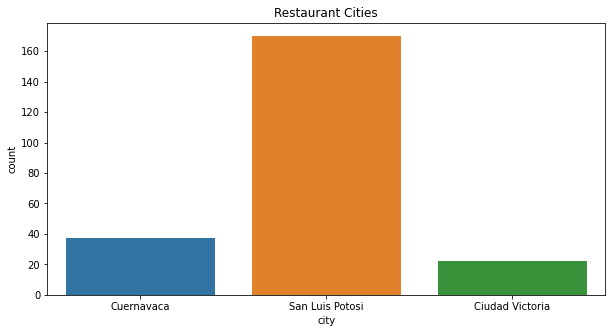

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(restaurants.city).set(title='Restaurant Cities')

In [ ]:
restaurants[restaurants['placeID'] == 134986]

,placeID,cuisine,rest_name,city,alcohol,smoking_area,dress_code,accessibility,price,ambience,franchise,parking_lot,payment


In [ ]:
restaurants.head()

,placeID,Rcuisine,latitude,longitude,name,city,state,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,other_services,parking_lot,Rpayment
0,135109,Italian,18.921785,-99.235350,Paniroles,Cuernavaca,?,Wine-Beer,not permitted,informal,no_accessibility,medium,quiet,f,Internet,none,cash
1,135106,Mexican,22.149709,-100.976093,El Rinc�n de San Francisco,San Luis Potosi,San Luis Potosi,Wine-Beer,only at bar,informal,partially,medium,familiar,f,none,none,cash
2,135106,Mexican,22.149709,-100.976093,El Rinc�n de San Francisco,San Luis Potosi,San Luis Potosi,Wine-Beer,only at bar,informal,partially,medium,familiar,f,none,none,VISA
3,135106,Mexican,22.149709,-100.976093,El Rinc�n de San Francisco,San Luis Potosi,San Luis Potosi,Wine-Beer,only at bar,informal,partially,medium,familiar,f,none,none,MasterCard-Eurocard
4,135104,Mexican,23.752982,-99.168434,vips,Ciudad Victoria,?,Full_Bar,not permitted,informal,completely,medium,familiar,t,variety,yes,cash


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Top Cuisines Offered')]

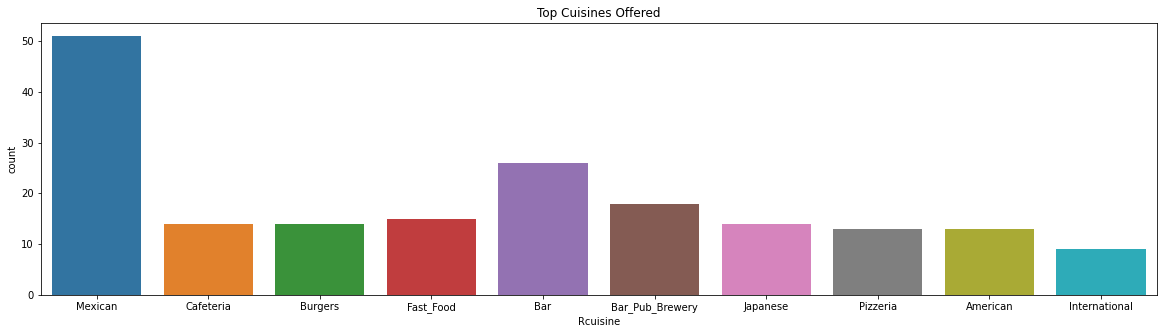

In [ ]:
top10_Rcuisine = restaurants['Rcuisine'].value_counts()[:10].index.to_list()
cuisine_pref = restaurants.Rcuisine[restaurants.Rcuisine.isin(top10_Rcuisine)]
plt.figure(figsize=(20,5))
sns.countplot(cuisine_pref).set(title = 'Top Cuisines Offered')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Price')]

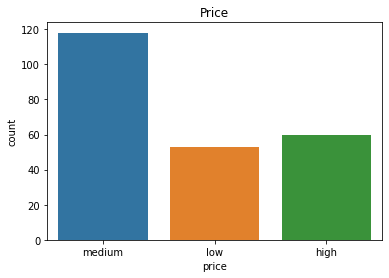

In [ ]:
sns.countplot(restaurants.price).set(title = 'Price')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Ambience')]

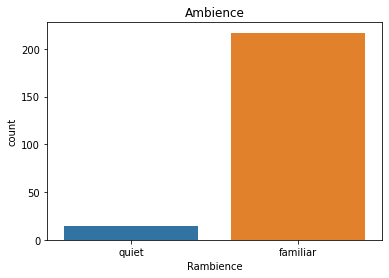

In [ ]:
sns.countplot(restaurants.Rambience).set(title = 'Ambience')

In [ ]:
pip install geopandas

In [ ]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [ ]:
mexico_map = gpd.read_file('mexico_administrative_boundaries_province_polygon.shp')

In [ ]:
restaurant_map = restaurants

In [ ]:
restaurant_map.head()

,placeID,Rcuisine,latitude,longitude,name,city,state,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,other_services,parking_lot,Rpayment
0,135109,Italian,18.921785,-99.235350,Paniroles,Cuernavaca,?,Wine-Beer,not permitted,informal,no_accessibility,medium,quiet,f,Internet,none,cash
1,135106,Mexican,22.149709,-100.976093,El Rinc�n de San Francisco,San Luis Potosi,San Luis Potosi,Wine-Beer,only at bar,informal,partially,medium,familiar,f,none,none,cash
2,135106,Mexican,22.149709,-100.976093,El Rinc�n de San Francisco,San Luis Potosi,San Luis Potosi,Wine-Beer,only at bar,informal,partially,medium,familiar,f,none,none,VISA
3,135106,Mexican,22.149709,-100.976093,El Rinc�n de San Francisco,San Luis Potosi,San Luis Potosi,Wine-Beer,only at bar,informal,partially,medium,familiar,f,none,none,MasterCard-Eurocard
4,135104,Mexican,23.752982,-99.168434,vips,Ciudad Victoria,?,Full_Bar,not permitted,informal,completely,medium,familiar,t,variety,yes,cash


In [ ]:
geometry = [Point(xy) for xy in zip(restaurant_map['longitude'], restaurant_map['latitude'])]
geometry[:3]

In [ ]:
geo_df = gpd.GeoDataFrame(restaurant_map, geometry=geometry)
geo_df.head()

,placeID,Rcuisine,latitude,longitude,name,city,state,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,other_services,parking_lot,Rpayment,geometry
0,135109,Italian,18.921785,-99.235350,Paniroles,Cuernavaca,?,Wine-Beer,not permitted,informal,no_accessibility,medium,quiet,f,Internet,none,cash,POINT (-99.23535 18.92178)
1,135106,Mexican,22.149709,-100.976093,El Rinc�n de San Francisco,San Luis Potosi,San Luis Potosi,Wine-Beer,only at bar,informal,partially,medium,familiar,f,none,none,cash,POINT (-100.97609 22.14971)
2,135106,Mexican,22.149709,-100.976093,El Rinc�n de San Francisco,San Luis Potosi,San Luis Potosi,Wine-Beer,only at bar,informal,partially,medium,familiar,f,none,none,VISA,POINT (-100.97609 22.14971)
3,135106,Mexican,22.149709,-100.976093,El Rinc�n de San Francisco,San Luis Potosi,San Luis Potosi,Wine-Beer,only at bar,informal,partially,medium,familiar,f,none,none,MasterCard-Eurocard,POINT (-100.97609 22.14971)
4,135104,Mexican,23.752982,-99.168434,vips,Ciudad Victoria,?,Full_Bar,not permitted,informal,completely,medium,familiar,t,variety,yes,cash,POINT (-99.16843 23.75298)


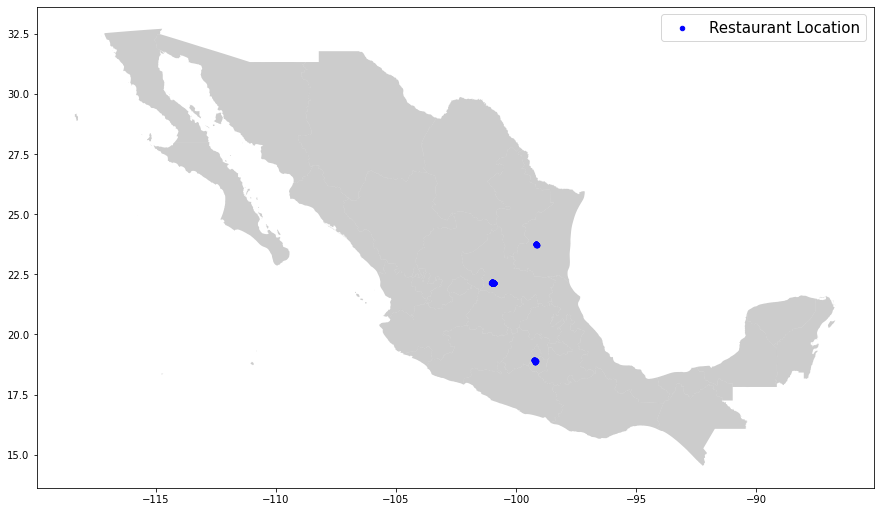

In [ ]:
fig,ax = plt.subplots(figsize = (15,15))
mexico_map.plot(ax=ax, alpha=.4, color='grey')
geo_df.plot(ax=ax, markersize = 20, color='blue', marker='o', label='Restaurant Location')
plt.legend(prop={'size':15})

In [ ]:
#lat_foc = 21
#lon_foc = -100
#fig.update_layout(geo = dict(projection_scale=10,center=dict(lat=lat_foc, lon=lon_foc)))
#fig.show()

In [ ]:
restaurants = restaurants.drop(['latitude', 'longitude', 'state'], axis=1)

In [ ]:
restaurants[restaurants.values == '?']

,placeID,Rcuisine,name,city,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,other_services,parking_lot,Rpayment,geometry


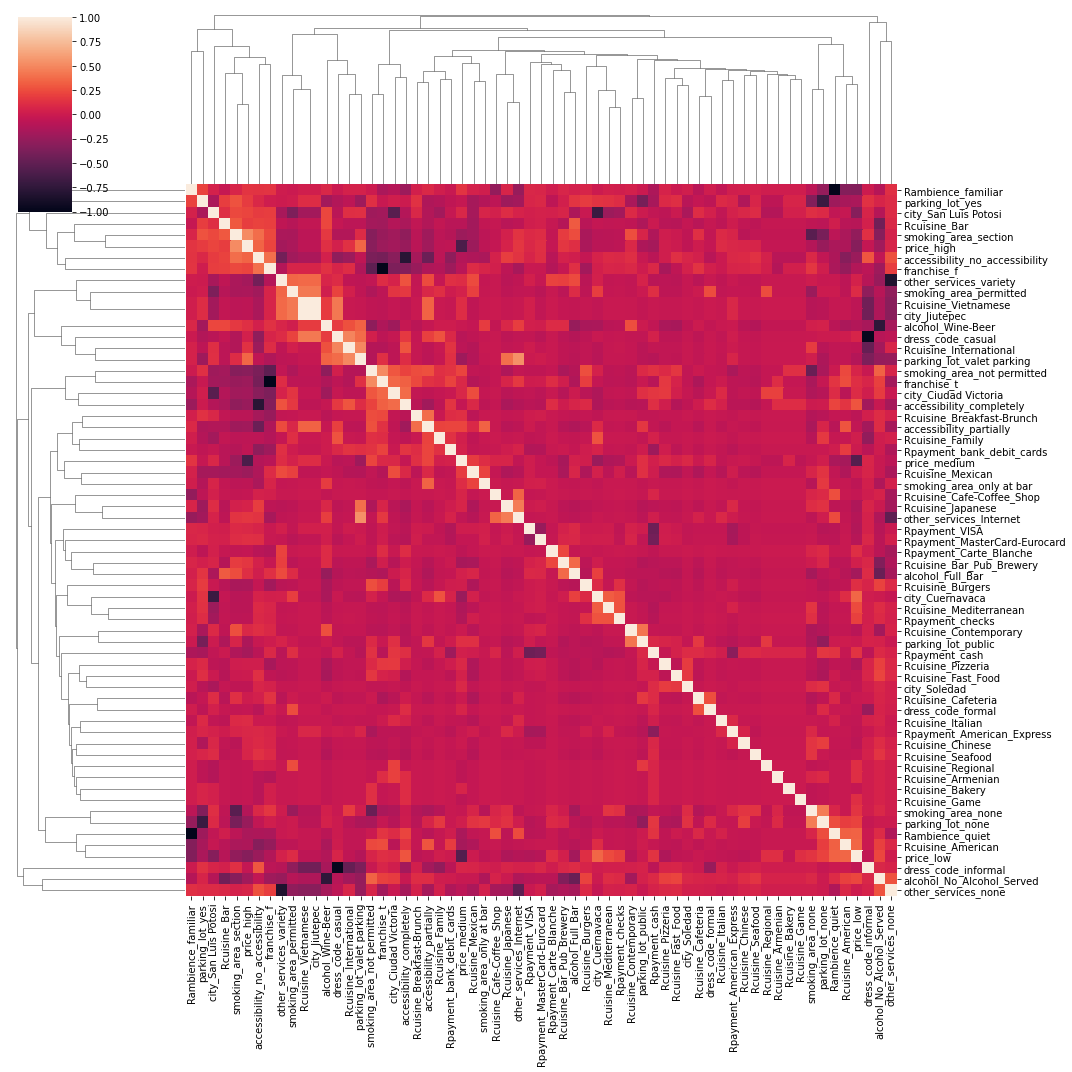

In [ ]:
rest_hm = restaurants.drop(['placeID', 'name'], axis=1)
rest_hm = pd.get_dummies(rest_hm)
sns.clustermap(rest_hm.corr(), yticklabels=True, xticklabels=True, figsize=(15,15))

In [ ]:
restaurants.head()

,placeID,Rcuisine,name,city,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,other_services,parking_lot,Rpayment,geometry
0,135109,Italian,Paniroles,Cuernavaca,Wine-Beer,not permitted,informal,no_accessibility,medium,quiet,f,Internet,none,cash,POINT (-99.23535 18.92178)
1,135106,Mexican,El Rinc�n de San Francisco,San Luis Potosi,Wine-Beer,only at bar,informal,partially,medium,familiar,f,none,none,cash,POINT (-100.97609 22.14971)
2,135106,Mexican,El Rinc�n de San Francisco,San Luis Potosi,Wine-Beer,only at bar,informal,partially,medium,familiar,f,none,none,VISA,POINT (-100.97609 22.14971)
3,135106,Mexican,El Rinc�n de San Francisco,San Luis Potosi,Wine-Beer,only at bar,informal,partially,medium,familiar,f,none,none,MasterCard-Eurocard,POINT (-100.97609 22.14971)
4,135104,Mexican,vips,Ciudad Victoria,Full_Bar,not permitted,informal,completely,medium,familiar,t,variety,yes,cash,POINT (-99.16843 23.75298)


In [ ]:
restaurants = restaurants.drop(['geometry', 'other_services'], axis=1)
restaurants.columns = ['placeID', 'cuisine', 'rest_name', 'city', 'alcohol', 'smoking_area', 'dress_code', 'accessibility', 'price', 'ambience', 'franchise', 'parking_lot', 'payment']

In [ ]:
users.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,32,variety,thrifty-protector,none,student,152.11878,medium,5.807087
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,31,technology,hunter-ostentatious,Catholic,student,88.18480,low,6.135171
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,32,none,hard-worker,Catholic,student,132.27720,low,5.544620
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,81,variety,hard-worker,none,professional,97.00328,medium,5.019685
21,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,29,none,thrifty-protector,Catholic,student,143.30030,medium,5.544620


In [ ]:
users = users.drop(['latitude', 'longitude'], axis=1)
users = users.rename(columns={'birth_year': 'age'})

In [ ]:
ratings.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [ ]:
restaurants.to_csv('restaurants.csv') 
files.download('restaurants.csv')
users.to_csv('users.csv')
files.download('users.csv')
ratings.to_csv('ratings.csv')
files.download('ratings.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>